# Start a new GRASS project

In this session we are going to see how to start a new grass project using a well standarized dataset: a DEM.

    cd /media/sf_LVM_shared/my_SE_data/exercise/
    wget https://raw.githubusercontent.com/selvaje/SE_data/master/exercise/grass_newproject.ipynb
    jupyter lab /media/sf_LVM_shared/my_SE_data/exercise/grass_newproject.ipynb


## Analize the dataset

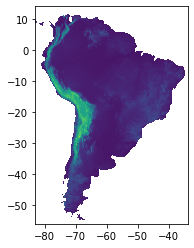

<AxesSubplot:>

In [1]:
import rasterio
from rasterio.plot import show
# digital elevation model
dem = rasterio.open("/media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif")
show(dem)

We can see the metadata of the the DEM using gdalinfo. 

The tif metadata should have well defined values such as:
* projection has to be well defined as proj4, EPSG,
* the extent should set at degree level (e.g. 14.0') or with one digit after the degree (e.g. 14.1'),
* the pixel resolution should be also well defined (e.g. 0.25', 0.008333333' not 0.008331234' or 0.05214534'),
* in case of using more then one data source the raster layers shold have the same extent and the pixel aligned,


In [2]:
! gdalinfo /media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif

Driver: GTiff/GeoTIFF
Files: /media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif
Size is 5880, 8400
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
         

## Create a LOCATION and MAPSET stored in a temporary folder

Using the flag *--tmp-location* we can create a LOCATION on the flight that will automaticaly removed when GRASS will be closed. 

For this example we are goint to use:
* [r.slope.aspect](https://grass.osgeo.org/grass83/manuals/r.slope.aspect.html) to calculate the slope
* [r.out.gdal](https://grass.osgeo.org/grass83/manuals/r.out.gdal.html) to export the GRASS raster to tif. 


In [8]:
%%bash 

grass  --text --tmp-location /media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif --exec <<'EOF'
r.external -e input=/media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif output=SA_elevation --o --q
g.list raster -p 
r.info  map=SA_elevation
r.slope.aspect elevation=SA_elevation slope=slope
r.info  map=slope
# export the "grass slope" to a geotif.
r.out.gdal --o -c -m -f createopt="COMPRESS=DEFLATE,ZLEVEL=9" type=Int16 format=GTiff nodata=-9999  input=slope  output=/home/osboxes/my_SE_data/exercise/grassdb/slope.tif
EOF

----------------------------------------------
raster files available in mapset <PERMANENT>:
SA_elevation

 +----------------------------------------------------------------------------+
 | Map:      SA_elevation                   Date: Mon May 20 11:37:09 2024    |
 | Mapset:   PERMANENT                      Login of Creator: user            |
 | Location: tmploc                                                           |
 | DataBase: /tmp/grass8-user-168760                                          |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  GDAL-link            Number of Categories: 0               |
 |   Data Type:    CELL                 Semantic label: (none)                |
 |   Rows:   

Starting GRASS GIS...
Creating new GRASS GIS location <tmploc>...
Cleaning up temporary files...

          __________  ___   __________    _______________
         / ____/ __ \/   | / ___/ ___/   / ____/  _/ ___/
        / / __/ /_/ / /| | \__ \\_  \   / / __ / / \__ \
       / /_/ / _, _/ ___ |___/ /__/ /  / /_/ // / ___/ /
       \____/_/ |_/_/  |_/____/____/   \____/___//____/

Welcome to GRASS GIS 8.2.1
GRASS GIS homepage:                      https://grass.osgeo.org
This version running through:            Bash Shell (/bin/bash)
Help is available with the command:      g.manual -i
See the licence terms with:              g.version -c
See citation options with:               g.version -x
Start the GUI with:                      g.gui wxpython
When ready to quit enter:                exit

   0   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Slope raster map <slope> complete
/bin/bash: line 

GRASS rasters support three data types:

    32bit signed integer (CELL) wich can be converted in GDAL using Byte/Int16/UInt16/UInt32/Int32
    single-precision floating-point (FCELL) wich can be converted in GDAL using Float32
    double-precision floating-point (DCELL) wich can be converted in GDAL using Float64

More info at https://grass.osgeo.org/grass83/manuals/r.out.gdal.html

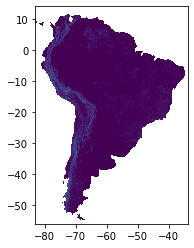

<AxesSubplot:>

In [2]:
import rasterio
from rasterio.plot import show
slope = rasterio.open("/home/osboxes/my_SE_data/exercise/grassdb/slope.tif")
show(slope)

In [31]:
! /usr/bin/openev/bin/openev /home/osboxes/my_SE_data/exercise/grassdb/slope.tif

Default software rendering mode (use -h if accelerated video card installed).
Loading tools from /usr/bin/openev/tools/Tool_Export.py
Loading tools from /usr/bin/openev/tools/Tool_ShapesGrid.py
Loading tools from /usr/bin/openev/tools/Tool_DriverList.py


The temporary folder is removed automaticaly when closing grass. 

## Create a LOCATION and MAPSET stored in a folder that can be accessed later on.
Using the flag *-e* we can create a LOCATION on the flight called "south_america" that can be access later on.  

In [3]:
%%bash 
rm -rf /home/osboxes/my_SE_data/exercise/grassdb/south_america

grass -c /media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif  -e /home/osboxes/my_SE_data/exercise/grassdb/south_america

Starting GRASS GIS...
Creating new GRASS GIS location <south_america>...
Cleaning up temporary files...
Cleaning up temporary files...


At this point the south_america LOCATION has been created with the defoult PERMANENT mapset

In [4]:
! ls /home/osboxes/my_SE_data/exercise/grassdb/south_america/

PERMANENT


In [5]:
! ls -l /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT


total 36
-rw-rw-r-- 1 user user  328 May 20 10:32 DEFAULT_WIND
-rw-rw-r-- 1 user user    1 May 20 10:32 MYNAME
-rw-rw-r-- 1 user user   65 May 20 10:32 PROJ_INFO
-rw-rw-r-- 1 user user   10 May 20 10:32 PROJ_SRID
-rw-rw-r-- 1 user user   40 May 20 10:32 PROJ_UNITS
-rw-rw-r-- 1 user user 1047 May 20 10:32 PROJ_WKT
drwxrwxr-x 2 user user 4096 May 20 10:32 sqlite
-rw-rw-r-- 1 user user   81 May 20 10:32 VAR
-rw-rw-r-- 1 user user  328 May 20 10:32 WIND


we can proceed in using the south_america LOCATION & the PERMANENT MAPSET using this syntax: 

In [6]:
%%bash 
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec <<'EOF'
r.external input=/media/sf_LVM_shared/my_SE_data/exercise/geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif output=SA_elevation --o --q
g.list raster -p 
r.info  map=SA_elevation
r.slope.aspect elevation=SA_elevation aspect=aspect --o
r.out.gdal --o -c -m -f createopt="COMPRESS=DEFLATE,ZLEVEL=9" type=Int16 format=GTiff nodata=-9999  input=aspect  output=/home/osboxes/my_SE_data/exercise/grassdb/aspect.tif
EOF

----------------------------------------------
raster files available in mapset <PERMANENT>:
SA_elevation

 +----------------------------------------------------------------------------+
 | Map:      SA_elevation                   Date: Mon May 20 10:33:27 2024    |
 | Mapset:   PERMANENT                      Login of Creator: user            |
 | Location: south_america                                                    |
 | DataBase: /home/user/my_SE_data/exercise/grassdb                           |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  GDAL-link            Number of Categories: 0               |
 |   Data Type:    CELL                 Semantic label: (none)                |
 |   Rows:   

Starting GRASS GIS...
Cleaning up temporary files...

          __________  ___   __________    _______________
         / ____/ __ \/   | / ___/ ___/   / ____/  _/ ___/
        / / __/ /_/ / /| | \__ \\_  \   / / __ / / \__ \
       / /_/ / _, _/ ___ |___/ /__/ /  / /_/ // / ___/ /
       \____/_/ |_/_/  |_/____/____/   \____/___//____/

Welcome to GRASS GIS 8.2.1
GRASS GIS homepage:                      https://grass.osgeo.org
This version running through:            Bash Shell (/bin/bash)
Help is available with the command:      g.manual -i
See the licence terms with:              g.version -c
See citation options with:               g.version -x
Start the GUI with:                      g.gui wxpython
When ready to quit enter:                exit

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Aspect raster map <aspect> complete
         as Int16. This can be avoided by using Float64.
Check

In [37]:
! /usr/bin/openev/bin/openev /home/osboxes/my_SE_data/exercise/grassdb/aspect.tif

Default software rendering mode (use -h if accelerated video card installed).
Loading tools from /usr/bin/openev/tools/Tool_Export.py
Loading tools from /usr/bin/openev/tools/Tool_ShapesGrid.py
Loading tools from /usr/bin/openev/tools/Tool_DriverList.py


or with line by line syntax

In [38]:
%%bash

grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec r.neighbors input=SA_elevation output=SA_elevation_10c_max method=maximum --o
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec r.info  map=SA_elevation_10c_max

 +----------------------------------------------------------------------------+
 | Map:      SA_elevation_10c_max           Date: Thu May 16 18:31:24 2024    |
 | Mapset:   PERMANENT                      Login of Creator: user            |
 | Location: south_america                                                    |
 | DataBase: /home/user/my_SE_data/exercise/grassdb                           |
 | Title:    3x3 neighborhood: maximum of SA_elevation                        |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    CELL                 Semantic label: (none)                |
 |   Rows:         8400                                                       |
 |   Columns:      5880                 

Starting GRASS GIS...
Cleaning up temporary files...
Executing <r.neighbors input=SA_elevation output=SA_elevation_10c_max method=maximum --o> ...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Execution of <r.neighbors input=SA_elevation output=SA_elevation_10c_max method=maximum --o> finished.
Cleaning up temporary files...
Starting GRASS GIS...
Cleaning up temporary files...
Executing <r.info map=SA_elevation_10c_max> ...
Execution of <r.info map=SA_elevation_10c_max> finished.
Cleaning up temporary files...


## GRASS add-ons
Grass GIS has a modular architecture that allows users to extend its functionality through add-ons or modules. These add-ons cover a wide range of functionalities and are developed and contributed by the Grass GIS community. You can see the full list of add-ons at https://grass.osgeo.org/grass83/manuals/addons/index.html 

For this exercise we are going to use 
[r.mapcalc.tiled](https://grass.osgeo.org/grass83/manuals/addons/r.mapcalc.tiled.html) that integrate [r.mapcalc](https://grass.osgeo.org/grass83/manuals/r.mapcalc.html) in a multicore enviroment. 

### Installation

Open a bash terminal and run

    cd /home/osboxes
    git clone https://github.com/OSGeo/grass-addons.git grass_addons 

when the download has ben done you can proceed with the installation. 

For this exercise we are going to use:
* [r.mapcalc.tiled](https://grass.osgeo.org/grass83/manuals/addons/r.mapcalc.tiled.html) add-on.
* [r.mapcalc](https://grass.osgeo.org/grass83/manuals/r.mapcalc.html)

Nontheless also consider to install and test the following add-on:

* [r.learn.train](https://grass.osgeo.org/grass83/manuals/addons/r.learn.train.html)
* [r.learn.ml](https://grass.osgeo.org/grass83/manuals/addons/r.learn.ml.html)
* [r.learn.predict](https://grass.osgeo.org/grass83/manuals/addons/r.learn.predict.html)


In [22]:
%%bash
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec g.extension extension=r.mapcalc.tiled  url=/home/osboxes/grass_addons/src/raster/r.mapcalc.tiled 
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec r.slope.aspect elevation=SA_elevation slope=slope nprocs=2 --o
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec time r.mapcalc.tiled expression="slope_msk = if(slope > 10, 10, 1)" width=5880 height=4200  overlap=0 nprocs=2 --o
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec time r.mapcalc       expression="slope_msk = if(slope > 10, 10, 1)" --o
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec r.info  map=slope_msk
# export the "grass slope_msk" to a geotif
grass  --text /home/osboxes/my_SE_data/exercise/grassdb/south_america/PERMANENT --exec r.out.gdal --o -c -m -f createopt="COMPRESS=DEFLATE,ZLEVEL=9" type=Byte format=GTiff nodata=0 input=slope_msk output=/home/user/my_SE_data/exercise/grassdb/slope_msk.tif

 +----------------------------------------------------------------------------+
 | Map:      slope_msk                      Date: Mon May 20 16:44:05 2024    |
 | Mapset:   PERMANENT                      Login of Creator: user            |
 | Location: south_america                                                    |
 | DataBase: /home/user/my_SE_data/exercise/grassdb                           |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    CELL                 Semantic label: (none)                |
 |   Rows:         16800                                                      |
 |   Columns:      11760                

Starting GRASS GIS...
Cleaning up temporary files...
Executing <r.slope.aspect elevation=SA_elevation slope=slope nprocs=2 --o> ...
   0   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Slope raster map <slope> complete
Execution of <r.slope.aspect elevation=SA_elevation slope=slope nprocs=2 --o> finished.
Cleaning up temporary files...
Starting GRASS GIS...
Cleaning up temporary files...
Executing <g.region res=0.0041666666666> ...
Execution of <g.region res=0.0041666666666> finished.
Cleaning up temporary files...
Starting GRASS GIS...
Cleaning up temporary files...
Executing <time r.mapcalc.tiled expression=slope_msk = if(slope > 10, 10, 1) width=5880 height=4200 overlap=0 nprocs=2 --o> ...
11.73user 1.22system 0:09.50elapsed 136%CPU (0avgtext+0avgdata 72268maxresident)k
11632inputs+16144outputs (48major+93774minor)pagefaults 0swaps
Execution of <time r.mapcalc.tiled expression=slope_msk = if(

As you can see not always the paralellization is beneficial

In [16]:
! /usr/bin/openev/bin/openev /home/osboxes/my_SE_data/exercise/grassdb/slope_msk.tif

Default software rendering mode (use -h if accelerated video card installed).
Loading tools from /usr/bin/openev/tools/Tool_Export.py
Loading tools from /usr/bin/openev/tools/Tool_ShapesGrid.py
Loading tools from /usr/bin/openev/tools/Tool_DriverList.py


Not all the GRASS module have been parallelized some example of parallization can be found here: 
https://htmlpreview.github.io/?https://github.com/petrasovaa/FUTURES-CONUS-talk/blob/main/foss4g2022.html#/

## Acknowledgments
This material has been developed as part of the NSF-funded POSE project TI-2303651: Growing GRASS OSE for Worldwide Access to Multidisciplinary Geospatial Analytics.